In [1]:
import os
import h2o
from h2o.automl import H2OAutoML
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    log_loss,
    roc_auc_score,
    precision_score,
    recall_score,
    confusion_matrix,
)

import joblib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Load pd_train
pd_train = pd.read_parquet("data/training_class.parquet")
pd_train["label"] = pd_train["Class"].apply(lambda x: 1 if x == "Hepatotoxicity" else 0)
print(pd_train.shape)

(1241, 16094)


In [3]:
# Load pd_test
pd_test = pd.read_parquet("data/testing_class.parquet")
pd_test["label"] = pd_test["Class"].apply(lambda x: 1 if x == "Hepatotoxicity" else 0)
print(pd_test.shape)

(286, 16094)


In [4]:
X_train = pd_train.drop(columns=["Class", "label"])
y_train = pd_train["label"]

X_test = pd_test.drop(columns=["Class", "label"])
y_test = pd_test["label"]

In [3]:
# X = pd.DataFrame(np.random.randn(1000, 20), columns=[f"feature_{i}" for i in range(20)])
# y = np.random.randint(2, size=1000)

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# # Convert y_train and y_test to Pandas Series if they are not already
# y_train = pd.Series(y_train, name="label")
# y_test = pd.Series(y_test, name="label")

# H2O optimization

In [5]:
# Set the number of cores (e.g., 4 cores)
os.environ['OPENBLAS_NUM_THREADS'] = '4'  # Limits to 4 cores
h2o.init(nthreads=4)  # Use 4 cores in H2O

# Convert y_train and y_test to Pandas Series if they are not already
y_train = pd.Series(y_train, name="label")
y_test = pd.Series(y_test, name="label")

# Convert data to H2O frame
train = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
test = h2o.H2OFrame(pd.concat([X_test, y_test], axis=1))

# Define the AutoML settings
aml = H2OAutoML(
    max_runtime_secs=3600, seed=42
)

# Train the model
aml.train(y="label", training_frame=train)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 0 mins
H2O_cluster_timezone:,Asia/Ho_Chi_Minh
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.5
H2O_cluster_version_age:,2 months and 2 days
H2O_cluster_name:,H2O_from_python_m12gbs1_28om3f
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.207 Gb
H2O_cluster_total_cores:,24
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
11:03:24.226: _train param, Dropping bad and constant columns: [KRFP301, KRFPC1251, KRFP308, KRFP4308, KRFP4309, KRFP4303, KRFPC2588, KRFP4300, KRFPC1253, KRFPC2589, KRFP4306, KRFPC1259, KRFPC2583, KRFP4307, KRFPC1258, KRFP4304, KRFP4305, KRFPC3, KRFPC4, KRFPC2570, KRFPC5, KRFPC2571, KRFPC6, KRFPC9, KRFPC1249, KRFPC1244, KRFPC1243, KRFPC2577, KRFPC1242, KRFPC2578, KRFPC2579, KRFPC1248, KRFPC2572, KRFPC1247, KRFPC2573, KRFPC1246, KRFPC2574, KRFPC2575, KRFPC3890, KRFPC3891, KRFPC1238, KRFPC2569, KRFPC1233, KRFPC3896, KRFP4325, KRFP4322, KRFPC1231, KRFPC2567, KRFP4323, KRFPC1230, KRFPC1237, KRFPC2562, KRFPC1235, KRFPC2563, KRFP4327, KRFPC1234, KRFP4310, KRFP4319, KRFPC1227, KRFPC2558, KRFPC2559, KRFPC1222, KRFPC2554, KRFP4314, KRFPC2555, KRFPC3886, KRFPC1220, KRFPC2556, KRFP4312, KRF

key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/4
# GBM base models (used / total),1/1
# XGBoost base models (used / total),0/1
# GLM base models (used / total),1/1
# DRF base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [6]:
# Get the best model and evaluate
lb = aml.leaderboard
print(lb)
best_model = aml.leader
print("Best model performance:", best_model.model_performance(test))

model_id                                                     rmse       mse       mae     rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_2_AutoML_2_20241101_110324  0.44575   0.198693  0.396854  0.312419                  0.198693
StackedEnsemble_BestOfFamily_7_AutoML_2_20241101_110324  0.445838  0.198771  0.401854  0.312758                  0.198771
StackedEnsemble_BestOfFamily_4_AutoML_2_20241101_110324  0.44614   0.199041  0.396151  0.312528                  0.199041
StackedEnsemble_BestOfFamily_5_AutoML_2_20241101_110324  0.446337  0.199217  0.3962    0.31257                   0.199217
StackedEnsemble_AllModels_1_AutoML_2_20241101_110324     0.44686   0.199684  0.397454  0.313057                  0.199684
StackedEnsemble_AllModels_4_AutoML_2_20241101_110324     0.446992  0.199802  0.395158  0.313016                  0.199802
StackedEnsemble_AllModels_3_AutoML_2_20241101_110324     0.447153  0.199946  0.39546   0.313199                  0.199946
StackedEnsemble_BestOfFa

In [8]:
from sklearn.metrics import precision_score, recall_score

# Get predictions and calculate additional metrics if needed
preds = aml.leader.predict(test).as_data_frame()
y_pred = (preds['predict'] > 0.5).astype(int)  # Binarize predictions for threshold of 0.5

# Calculate precision, recall, and sensitivity
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)  # Same as sensitivity for positive class
auc = roc_auc_score(y_test, y_pred)
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("AUC:", auc)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Precision: 0.9313725490196079
Recall (Sensitivity): 0.8597285067873304
AUC: 0.8221719457013574


/home/m12gbs1/miniconda3/envs/dili/lib/python3.9/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


# PCA optimization

In [2]:
# # Example data (replace with actual data)
# X = pd.DataFrame(np.random.randn(1000, 1600), columns=[f"feature_{i}" for i in range(1600)])
# y = np.random.randint(2, size=1000)

# # Split data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
os.environ['OPENBLAS_NUM_THREADS'] = '8'  # Limits to 8 cores
h2o.init(nthreads=8)  # Use 8 cores in H2O

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.24" 2024-07-16; OpenJDK Runtime Environment (build 11.0.24+8-post-Ubuntu-1ubuntu322.04); OpenJDK 64-Bit Server VM (build 11.0.24+8-post-Ubuntu-1ubuntu322.04, mixed mode, sharing)
  Starting server from /home/m12gbs1/miniconda3/envs/dili/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpl5_uemdi
  JVM stdout: /tmp/tmpl5_uemdi/h2o_m12gbs1_started_from_python.out
  JVM stderr: /tmp/tmpl5_uemdi/h2o_m12gbs1_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Asia/Ho_Chi_Minh
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.5
H2O_cluster_version_age:,2 months and 3 days
H2O_cluster_name:,H2O_from_python_m12gbs1_xdo3qg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.771 Gb
H2O_cluster_total_cores:,24
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [6]:
# Convert y_train and y_test to Pandas Series with correct label names
y_train = pd.Series(y_train, name="label")
y_test = pd.Series(y_test, name="label")

# List to store AUC scores for different PCA dimensions
# dimensions = range(100, 500, 100)  # Check PCA dimensions from 1 to 10
dimensions = [10, 20, 50, 100, 200, 300, 500, 800, 1000, 1200]
# dimensions = [10, 20]
h2o_results = []  # List to store results

# Loop over different numbers of PCA components
for n_components in dimensions:
    # Apply PCA and convert to DataFrame
    pca = PCA(n_components=n_components)
    X_train_pca = pd.DataFrame(pca.fit_transform(X_train))
    X_test_pca = pd.DataFrame(pca.transform(X_test))
    
    # Concatenate PCA-transformed data with target labels
    train = h2o.H2OFrame(pd.concat([X_train_pca, y_train.reset_index(drop=True)], axis=1))
    test = h2o.H2OFrame(pd.concat([X_test_pca, y_test.reset_index(drop=True)], axis=1))

    # Set up H2O AutoML with runtime settings
    aml = H2OAutoML(max_runtime_secs=600, seed=42)

    # Train the model
    aml.train(y="label", training_frame=train)
    
    # Access best model
    best_model = aml.leader
    model_name = best_model.algo  # Algorithm name
    model_params = best_model.get_params()  # Parameters of the best model

    # Predict on the test set and calculate AUC
    preds = best_model.predict(test).as_data_frame()
    y_pred = preds['predict']
    auc = roc_auc_score(y_test, y_pred)

    y_pred = (y_pred > 0.5).astype(int)  # Binarize predictions for threshold of 0.5
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)  # Same as sensitivity for positive class

    # Calculate sensitivity and specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    # Append results to list
    result = {
        "PCA Components": n_components,
        "Model Name": model_name,
        "Parameters": model_params,
        "AUC": auc,
        "Precision": precision,
        "Recall": recall,
        "Sensitivity": sensitivity,
        "Specificity": specificity,
    }
    h2o_results.append(result)
    
    print(result)

# Shutdown H2O
h2o.shutdown(prompt=False)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:23:34.989: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


20:23:36.92: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
20:23:36.262: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
20:23:36.665: _response param, We have detected that your response column has only 2 unique

/home/m12gbs1/miniconda3/envs/dili/lib/python3.9/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:33:27.927: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


20:33:28.898: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
20:33:28.930: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


20:33:29.38: _response param, We have detected that your response column has only 2 unique 

/home/m12gbs1/miniconda3/envs/dili/lib/python3.9/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:43:21.800: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


20:43:23.7: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


20:43:23.35: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


20:43:23.294: _response param, We have detected that your response column has only 2 unique 

/home/m12gbs1/miniconda3/envs/dili/lib/python3.9/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:53:17.910: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


20:53:19.370: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


20:53:19.470: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
20:53:19.924: _response param, We have detected that your response column has only 2 uni

/home/m12gbs1/miniconda3/envs/dili/lib/python3.9/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
21:03:13.408: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
21:03:15.395: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
21:03:15.667: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
21:03:16.580: _response param, We have detected that your response column has only 2 uniq

/home/m12gbs1/miniconda3/envs/dili/lib/python3.9/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
21:13:11.722: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
21:13:14.213: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


21:13:14.529: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
21:13:15.669: _response param, We have detected that your response column has only 2 un

/home/m12gbs1/miniconda3/envs/dili/lib/python3.9/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
21:23:10.839: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
21:23:14.400: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


21:23:14.872: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
21:23:16.419: _response param, We have detected that your response column has only 2 un

/home/m12gbs1/miniconda3/envs/dili/lib/python3.9/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
21:33:14.269: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
21:33:19.333: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
21:33:20.63: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


21:33:22.564: _response param, We have detected that your response column has only 2 uni

/home/m12gbs1/miniconda3/envs/dili/lib/python3.9/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
21:43:15.798: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
21:43:21.857: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
21:43:22.874: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
21:43:26.142: _response param, We have detected that your response column has only 2 uni

/home/m12gbs1/miniconda3/envs/dili/lib/python3.9/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
21:53:18.605: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
21:53:25.836: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


21:53:28.492: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
21:53:32.741: _response param, We have detected that your response column has only 2 

/home/m12gbs1/miniconda3/envs/dili/lib/python3.9/site-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/tmp/ipykernel_2655957/2817988861.py:63: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown(prompt=False)


In [7]:
# Convert results to DataFrame
h2o_df = pd.DataFrame(h2o_results)
h2o_df

,PCA Components,Model Name,Parameters,AUC,Precision,Recall,Sensitivity,Specificity
0,10,stackedensemble,"{'model_id': None, 'training_frame': None, 're...",0.861887,0.921466,0.796380,0.796380,0.769231
1,20,stackedensemble,"{'model_id': None, 'training_frame': None, 're...",0.877619,0.922680,0.809955,0.809955,0.769231
2,50,stackedensemble,"{'model_id': None, 'training_frame': None, 're...",0.909502,0.926108,0.850679,0.850679,0.769231
3,100,stackedensemble,"{'model_id': None, 'training_frame': None, 're...",0.843926,0.904523,0.814480,0.814480,0.707692
4,200,stackedensemble,"{'model_id': None, 'training_frame': None, 're...",0.915350,0.923810,0.877828,0.877828,0.753846
5,300,stackedensemble,"{'model_id': None, 'training_frame': None, 're...",0.920710,0.928910,0.886878,0.886878,0.769231
6,500,stackedensemble,"{'model_id': None, 'training_frame': None, 're...",0.891612,0.926108,0.850679,0.850679,0.769231
7,800,stackedensemble,"{'model_id': None, 'training_frame': None, 're...",0.890150,0.923077,0.868778,0.868778,0.753846
8,1000,stackedensemble,"{'model_id': None, 'training_frame': None, 're...",0.859172,0.912371,0.800905,0.800905,0.738462
9,1200,stackedensemble,"{'model_id': None, 'training_frame': None, 're...",0.884024,0.940789,0.647059,0.647059,0.861538


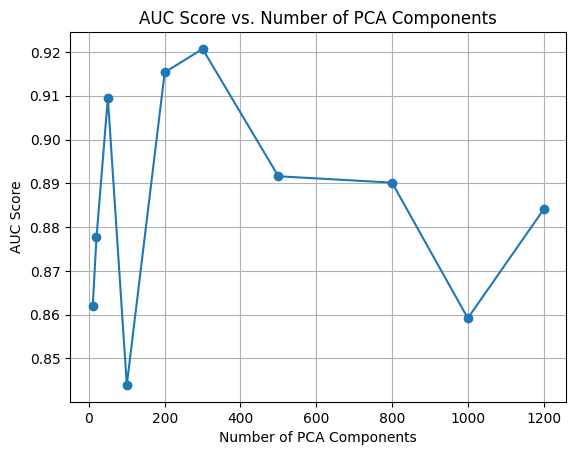

In [8]:

# Plot AUC scores against the number of PCA components
plt.plot(h2o_df["PCA Components"], h2o_df["AUC"], marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('AUC Score')
plt.title('AUC Score vs. Number of PCA Components')
plt.grid()
plt.show()